In [61]:
import pickle
from TemporalNetwork import ContTempNetwork
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
# Generate dynamic network sequence with one change point of type merge
# %run /home/b/skoove/compute/entropy/flow_stability/benchmark_merge.py --sizes_1 25 25 25 25 --sizes_2 50 50 --p 0.1 --q 0.02 --n_samples 100 --sequence

 Change point at t = 37


In [44]:
# Load training data
training_data_path = '/home/b/skoove/compute/entropy/flow_stability/03_26_14:25:34_merge_T_100_n_100_k1_4_k2_2_p_0.1_q_0.02_0/'
with open(training_data_path + 'data.p', 'rb') as f:
    training_data = pickle.load(f)
# with open(training_data_path + 'labels.p', 'rb') as f:
#     training_labels = pickle.load(f)
# print(training_labels)

/home/b/skoove/compute/entropy/S_env/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [45]:
source_nodes = []
target_nodes = []
starting_times = []
ending_times = []

for i in range(100):
    for j in range(training_data[i].edges()[0].shape[0]):
        source_nodes.append(int(training_data[i].edges()[0][j]))
        target_nodes.append(int(training_data[i].edges()[1][j]))
        starting_times.append(i)
        ending_times.append(i+1)

In [46]:
dynamic_SBM = ContTempNetwork(source_nodes=source_nodes,
                       target_nodes=target_nodes,
                       starting_times=starting_times,
                       ending_times=ending_times,
                       merge_overlapping_events=True)

PID  1015996  :  merged  25502  events
PID  1015996  :  merged  0  events


In [ ]:
#dynamic_SBM.save('dynamic_SBM')

In [54]:
matrix1_0 = dynamic_SBM.compute_static_adjacency_matrix(start_time=0, end_time=37).toarray()
matrix2_0 = dynamic_SBM.compute_static_adjacency_matrix(start_time=37, end_time=100).toarray()

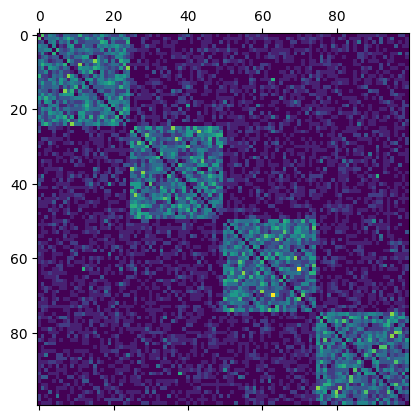

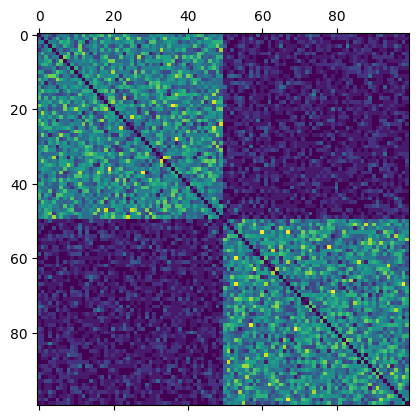

In [55]:
plt.matshow(matrix1_0)
plt.matshow(matrix2_0)

In [59]:
selected_lamdas = np.logspace(-3,1,10)
window = 10

Conditional_S_selected0 = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'/scratch/tmp/180/skoove/dynamic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected0.append(S_rate['window_S'][f'{lamda:.11f}'])

# Define the time intervals for the x-axis
time_intervals_0 = [(0, 37), (37, 100)]

/tmp/ipykernel_1015996/2178917986.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


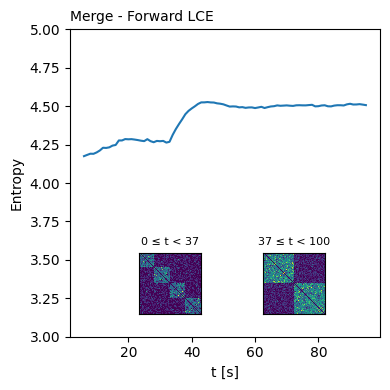

In [79]:
# Column 1: Plot A
fig = plt.figure(figsize=(4, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 1)  # Grid: 1 row, 4 columns

ax_a = fig.add_subplot(gs[0, 0])
index = 4
S = Conditional_S_selected0[index]

ax_a.plot(dynamic_SBM.times[window // 2 + 1: -window // 2], S[1:], alpha=1)

ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_ylim(3, 5)
ax_a.set_title("Merge - Forward LCE", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1_0, matrix2_0]
positions = [0.20, 0.60]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals_0[i][0]} ≤ t < {time_intervals_0[i][1]}", fontsize=8)

plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/merge_LCE_slides.png', format='png', dpi=300)

In [77]:
S

[0,
 4.174901318890737,
 4.182986150679605,
 4.190766694409217,
 4.190114714646801,
 4.199154036340751,
 4.2117446830493295,
 4.229476876857289,
 4.228319476434339,
 4.23228668872237,
 4.243458691051431,
 4.24763912642389,
 4.276955233051151,
 4.2770586209172,
 4.285902711035375,
 4.2845222754219545,
 4.285478181567873,
 4.282720150342543,
 4.2794296644936995,
 4.275380406818152,
 4.272616126138543,
 4.285446028021651,
 4.272448883876168,
 4.265419230040843,
 4.273966802274084,
 4.2720516122251615,
 4.273999300132615,
 4.263161906961831,
 4.268252596553825,
 4.313394576183486,
 4.351226917181197,
 4.38412069003918,
 4.414935543432473,
 4.447795592172208,
 4.46943073360099,
 4.485238268153693,
 4.499231748806816,
 4.514600351350042,
 4.524650327512485,
 4.5248143450076626,
 4.526886023366935,
 4.524456328256684,
 4.523764381446909,
 4.518513146331773,
 4.516136548116805,
 4.512036480078442,
 4.504596381658997,
 4.49745767994977,
 4.4986252319796955,
 4.497765628885205,
 4.49226953614546